In [67]:
import pandas as pd
import numpy as np
import json
import geopandas as gp
import matplotlib.pyplot as plt

In [68]:
# import googlemaps as gm
import pprint
import time

ModuleNotFoundError: No module named 'googlemaps'

In [ ]:
import re
import seaborn as sns
sns.set()

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.set()

In [ ]:
Restaurants_nearby_all = pd.read_csv('Restaurants_nearby_all_9954.csv')

In [ ]:
del Restaurants_nearby_all['Unnamed: 0']

In [ ]:
business_data_cleaned = pd.DataFrame(pd.read_csv('business.csv'))

In [69]:
Restaurants_nearby_all['name'] = Restaurants_nearby_all['name'].str.lower()
business_data_cleaned['name'] = business_data_cleaned['name'].str.lower()

In [70]:
Nonoverlap_rest_API = (Restaurants_nearby_all[-(Restaurants_nearby_all['name'].isin(business_data_cleaned['name']))])

In [71]:
Nonoverlap_rest_API = Nonoverlap_rest_API.reset_index(drop=True)

In [72]:
Nonoverlap_rest_API.head()

,geometry,icon,id,name,opening_hours,permanently_closed,photos,place_id,plus_code,price_level,rating,reference,scope,types,user_ratings_total,vicinity
0,"{'location': {'lat': 41.4629508, 'lng': -82.17...",https://maps.gstatic.com/mapfiles/place_api/ic...,231f6b3e930705781173dee815951403f29bb0ba,scorcher's casual eatery & draft house,{'open_now': True},NaN,"[{'height': 2988, 'html_attributions': ['<a hr...",ChIJ41J07AKdMIgR7qeRTjC3oGI,"{'compound_code': 'FR7G+5Q Lorain, Sheffield T...",NaN,4.0,ChIJ41J07AKdMIgR7qeRTjC3oGI,GOOGLE,"['bar', 'restaurant', 'point_of_interest', 'fo...",242.0,"900 Broadway Avenue, Lorain"
1,"{'location': {'lat': 41.44411710000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,cdd9473756d09af73843faccb3b2e7415fdd919d,american slovak club,{'open_now': True},NaN,"[{'height': 594, 'html_attributions': ['<a hre...",ChIJdS9o4FGcMIgR8TvM0-RZSX8,"{'compound_code': 'CRVP+J4 Lorain, Sheffield T...",NaN,4.5,ChIJdS9o4FGcMIgR8TvM0-RZSX8,GOOGLE,"['bowling_alley', 'bar', 'restaurant', 'point_...",277.0,"2915 Broadway Avenue, Lorain"
2,"{'location': {'lat': 41.44009329999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,2f95c497755af6f55a8d16ec77f2e0640e20be44,yala's pizzeria,{'open_now': True},NaN,"[{'height': 4160, 'html_attributions': ['<a hr...",ChIJN9j6ZLmdMIgRuIjJAzbrc5M,"{'compound_code': 'CRR7+2Q Lorain, Sheffield T...",2.0,4.6,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,GOOGLE,"['restaurant', 'point_of_interest', 'food', 'e...",191.0,"3352 Oberlin Avenue, Lorain"
3,"{'location': {'lat': 41.46578379999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,572983b6565dc04ef54c07c2c1e248c923d612f7,bascule brewery and public house,{'open_now': True},NaN,"[{'height': 2988, 'html_attributions': ['<a hr...",ChIJVVVVVRydMIgRG5VSst18Snk,"{'compound_code': 'FR8V+85 Lorain, Sheffield T...",2.0,4.7,ChIJVVVVVRydMIgRG5VSst18Snk,GOOGLE,"['bar', 'restaurant', 'point_of_interest', 'fo...",83.0,"1397 Colorado Avenue, Lorain"
4,"{'location': {'lat': 33.64012189999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,37f64b9d486e4344f2e9512515dbf8afc8d76aa5,subway restaurants,{'open_now': True},NaN,"[{'height': 3456, 'html_attributions': ['<a hr...",ChIJGdKqMNpuK4cRJYpiriPY4Ck,"{'compound_code': 'JVRC+2F Phoenix, Arizona, U...",1.0,3.9,ChIJGdKqMNpuK4cRJYpiriPY4Ck,GOOGLE,"['restaurant', 'point_of_interest', 'food', 'e...",67.0,3210 W Bell Rd Suite 100 Upton Plaza Shopping ...


In [73]:
len(Nonoverlap_rest_API)

2777

In [74]:
Nonoverlap_rest_API['Latitude'] = Nonoverlap_rest_API['geometry'].apply(lambda x: pd.to_numeric(re.findall('(?<=lat\':).*?(?=\,)',x)[0]))

In [75]:
Nonoverlap_rest_API['Longitude'] = Nonoverlap_rest_API['geometry'].apply(lambda x: pd.to_numeric(re.findall('(?<=lng\':).*?(?=\})',x)[0]))

In [76]:
Nonoverlap_rest_API.head()

,geometry,icon,id,name,opening_hours,permanently_closed,photos,place_id,plus_code,price_level,rating,reference,scope,types,user_ratings_total,vicinity,Latitude,Longitude
0,"{'location': {'lat': 41.4629508, 'lng': -82.17...",https://maps.gstatic.com/mapfiles/place_api/ic...,231f6b3e930705781173dee815951403f29bb0ba,scorcher's casual eatery & draft house,{'open_now': True},NaN,"[{'height': 2988, 'html_attributions': ['<a hr...",ChIJ41J07AKdMIgR7qeRTjC3oGI,"{'compound_code': 'FR7G+5Q Lorain, Sheffield T...",NaN,4.0,ChIJ41J07AKdMIgR7qeRTjC3oGI,GOOGLE,"['bar', 'restaurant', 'point_of_interest', 'fo...",242.0,"900 Broadway Avenue, Lorain",41.462951,-82.173103
1,"{'location': {'lat': 41.44411710000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,cdd9473756d09af73843faccb3b2e7415fdd919d,american slovak club,{'open_now': True},NaN,"[{'height': 594, 'html_attributions': ['<a hre...",ChIJdS9o4FGcMIgR8TvM0-RZSX8,"{'compound_code': 'CRVP+J4 Lorain, Sheffield T...",NaN,4.5,ChIJdS9o4FGcMIgR8TvM0-RZSX8,GOOGLE,"['bowling_alley', 'bar', 'restaurant', 'point_...",277.0,"2915 Broadway Avenue, Lorain",41.444117,-82.164648
2,"{'location': {'lat': 41.44009329999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,2f95c497755af6f55a8d16ec77f2e0640e20be44,yala's pizzeria,{'open_now': True},NaN,"[{'height': 4160, 'html_attributions': ['<a hr...",ChIJN9j6ZLmdMIgRuIjJAzbrc5M,"{'compound_code': 'CRR7+2Q Lorain, Sheffield T...",2.0,4.6,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,GOOGLE,"['restaurant', 'point_of_interest', 'food', 'e...",191.0,"3352 Oberlin Avenue, Lorain",41.440093,-82.185601
3,"{'location': {'lat': 41.46578379999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,572983b6565dc04ef54c07c2c1e248c923d612f7,bascule brewery and public house,{'open_now': True},NaN,"[{'height': 2988, 'html_attributions': ['<a hr...",ChIJVVVVVRydMIgRG5VSst18Snk,"{'compound_code': 'FR8V+85 Lorain, Sheffield T...",2.0,4.7,ChIJVVVVVRydMIgRG5VSst18Snk,GOOGLE,"['bar', 'restaurant', 'point_of_interest', 'fo...",83.0,"1397 Colorado Avenue, Lorain",41.465784,-82.157101
4,"{'location': {'lat': 33.64012189999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,37f64b9d486e4344f2e9512515dbf8afc8d76aa5,subway restaurants,{'open_now': True},NaN,"[{'height': 3456, 'html_attributions': ['<a hr...",ChIJGdKqMNpuK4cRJYpiriPY4Ck,"{'compound_code': 'JVRC+2F Phoenix, Arizona, U...",1.0,3.9,ChIJGdKqMNpuK4cRJYpiriPY4Ck,GOOGLE,"['restaurant', 'point_of_interest', 'food', 'e...",67.0,3210 W Bell Rd Suite 100 Upton Plaza Shopping ...,33.640122,-112.128793


In [77]:
Nonoverlap_rest_API = Nonoverlap_rest_API[- ((Nonoverlap_rest_API['Latitude'].isin(business_data_cleaned['latitude'])  \
) & (Nonoverlap_rest_API['Longitude'].isin(business_data_cleaned['longitude'])))]

In [78]:
Nonoverlap_rest_API.shape

(2628, 18)

In [79]:
Nonoverlap_rest_API.drop(['permanently_closed','geometry','photos','types','icon'],axis=1, inplace=True)

In [80]:
# Nonoverlap_rest_API.to_csv('Places_nonoverlapping.csv')

In [81]:
Nonoverlap_rest_API.head()

,id,name,opening_hours,place_id,plus_code,price_level,rating,reference,scope,user_ratings_total,vicinity,Latitude,Longitude
0,231f6b3e930705781173dee815951403f29bb0ba,scorcher's casual eatery & draft house,{'open_now': True},ChIJ41J07AKdMIgR7qeRTjC3oGI,"{'compound_code': 'FR7G+5Q Lorain, Sheffield T...",NaN,4.0,ChIJ41J07AKdMIgR7qeRTjC3oGI,GOOGLE,242.0,"900 Broadway Avenue, Lorain",41.462951,-82.173103
1,cdd9473756d09af73843faccb3b2e7415fdd919d,american slovak club,{'open_now': True},ChIJdS9o4FGcMIgR8TvM0-RZSX8,"{'compound_code': 'CRVP+J4 Lorain, Sheffield T...",NaN,4.5,ChIJdS9o4FGcMIgR8TvM0-RZSX8,GOOGLE,277.0,"2915 Broadway Avenue, Lorain",41.444117,-82.164648
2,2f95c497755af6f55a8d16ec77f2e0640e20be44,yala's pizzeria,{'open_now': True},ChIJN9j6ZLmdMIgRuIjJAzbrc5M,"{'compound_code': 'CRR7+2Q Lorain, Sheffield T...",2.0,4.6,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,GOOGLE,191.0,"3352 Oberlin Avenue, Lorain",41.440093,-82.185601
3,572983b6565dc04ef54c07c2c1e248c923d612f7,bascule brewery and public house,{'open_now': True},ChIJVVVVVRydMIgRG5VSst18Snk,"{'compound_code': 'FR8V+85 Lorain, Sheffield T...",2.0,4.7,ChIJVVVVVRydMIgRG5VSst18Snk,GOOGLE,83.0,"1397 Colorado Avenue, Lorain",41.465784,-82.157101
4,37f64b9d486e4344f2e9512515dbf8afc8d76aa5,subway restaurants,{'open_now': True},ChIJGdKqMNpuK4cRJYpiriPY4Ck,"{'compound_code': 'JVRC+2F Phoenix, Arizona, U...",1.0,3.9,ChIJGdKqMNpuK4cRJYpiriPY4Ck,GOOGLE,67.0,3210 W Bell Rd Suite 100 Upton Plaza Shopping ...,33.640122,-112.128793


Geoplotting the non overlapping restuarants data extracted

In [82]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [83]:
from shapely.geometry import Point

In [84]:
# Creating point coordinates from lat and long
Nonoverlap_rest_API['location_coordinates'] = list(zip(Nonoverlap_rest_API['Longitude']  , Nonoverlap_rest_API['Latitude']))
Nonoverlap_rest_API['location_coordinates'] = Nonoverlap_rest_API['location_coordinates'].apply(Point)

In [85]:
geo_Nonoverlap_rest_API = gp.GeoDataFrame(Nonoverlap_rest_API, geometry='location_coordinates')

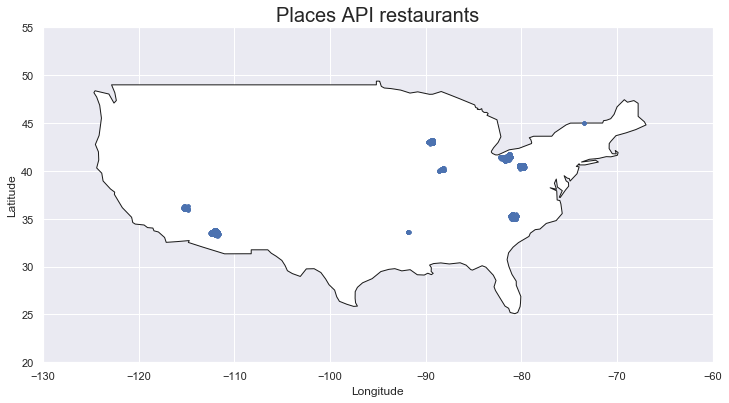

In [86]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white')
geo_Nonoverlap_rest_API.plot(ax = ax, markersize = 10)
ax.set(xlim=(-130, -60), ylim=(20,55))
plt.gcf().set_size_inches(12,7)
plt.title('Places API restaurants',fontdict= {'fontsize': 20})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [87]:
Nonoverlap_rest_API.dtypes

id                       object
name                     object
opening_hours            object
place_id                 object
plus_code                object
price_level             float64
rating                  float64
reference                object
scope                    object
user_ratings_total      float64
vicinity                 object
Latitude                float64
Longitude               float64
location_coordinates     object
dtype: object

In [88]:
Nonoverlap_rest_API.describe()

,price_level,rating,user_ratings_total,Latitude,Longitude
count,1816.000000,2542.000000,2542.000000,2628.000000,2628.000000
mean,1.583700,4.172777,322.739969,37.706556,-92.815316
std,0.576528,0.446437,791.730697,3.453719,14.939879
min,1.000000,1.000000,1.000000,33.233624,-115.350916
25%,1.000000,4.000000,54.000000,34.938848,-111.926325
50%,2.000000,4.300000,165.000000,36.167395,-81.786152
75%,2.000000,4.500000,354.000000,41.154138,-80.849183
max,4.000000,5.000000,24384.000000,44.981489,-73.445375


In [89]:
Nonoverlap_rest_API.isna().sum()

id                        0
name                      0
opening_hours           169
place_id                  0
plus_code                 1
price_level             812
rating                   86
reference                 0
scope                     0
user_ratings_total       86
vicinity                  1
Latitude                  0
Longitude                 0
location_coordinates      0
dtype: int64

In [90]:
from statistics import mode

In [91]:
Nonoverlap_rest_API['rating']  = Nonoverlap_rest_API['rating'].fillna(0)
Nonoverlap_rest_API['user_ratings_total']  = Nonoverlap_rest_API['user_ratings_total'].fillna(0)

In [92]:
Nonoverlap_rest_API['price_level']  = Nonoverlap_rest_API['price_level'].fillna(mode(Nonoverlap_rest_API['price_level']))

In [93]:
Nonoverlap_rest_API['rating_bucket'] = [5 if x > 4.5 else 4 if x> 3.5  \
                                        else 3 if x > 2.5 else 2 if x> 1.5 else 1 if x> 0.5 else 0 \
                                        for x in Nonoverlap_rest_API['rating']]

In [94]:
Nonoverlap_rest_API['rating_bucket'].value_counts()

4    1948
5     387
3     186
0      86
2      19
1       2
Name: rating_bucket, dtype: int64

In [112]:
plt.rcParams['figure.figsize'] = (8, 6)

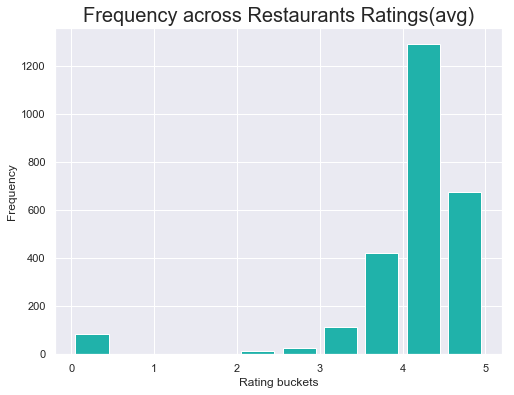

In [113]:
plt.hist(Nonoverlap_rest_API['rating'],rwidth = 0.8, color = 'lightseagreen')
plt.title('Frequency across Restaurants Ratings(avg)',fontdict= {'fontsize': 20})
plt.xlabel('Rating buckets')
plt.ylabel('Frequency')
plt.show()

**Takeaway:** <br>
A lot of Restaurants on average are rated positively in Google dataset

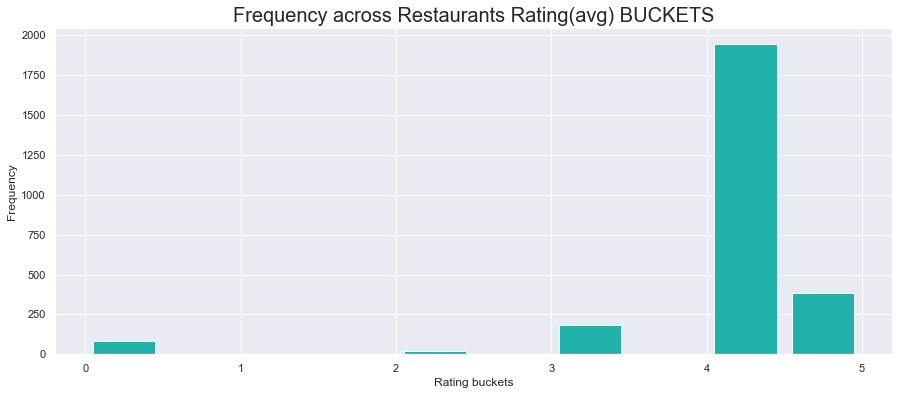

In [96]:
plt.hist(Nonoverlap_rest_API['rating_bucket'],histtype='bar',rwidth = 0.8,color = 'lightseagreen')
plt.title('Frequency across Restaurants Rating(avg) BUCKETS',fontdict= {'fontsize': 20})
plt.xlabel('Rating buckets')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5])
plt.show()

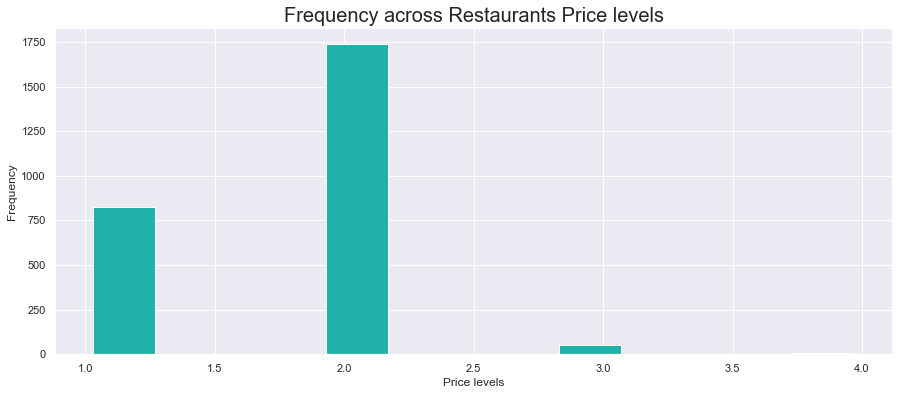

In [97]:
plt.hist(pd.to_numeric(Nonoverlap_rest_API['price_level']),rwidth = 0.8,color = 'lightseagreen')
plt.title('Frequency across Restaurants Price levels',fontdict= {'fontsize': 20})
plt.xlabel('Price levels')
plt.ylabel('Frequency')
plt.show()

Price levels: <br>
0 — Free <br>
1 — Inexpensive <br>
2 — Moderate <br>
3 — Expensive <br>
4 — Very Expensive <br>

**Takeaway:** <br>
Most of the restaurants are moderately priced with some protion being Inexpensive restaurants.

# Cleaning place API detail data 

 for corresponding nonoverlapping restaurants

In [98]:
Place_details = pd.read_csv('Place_detail_data.csv')

In [99]:
Place_details.drop(['Unnamed: 0'],axis=1, inplace=True)

In [100]:
Place_details.head()

,author_name,author_url,language,place_id,profile_photo_url,rating,relative_time_description,text,time
0,Stephen O'Ryan,https://www.google.com/maps/contrib/1143032008...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-lvtilWu9NbM...,4,a month ago,"Pretty good food, great burgers, and always mu...",1551493659
1,Michael Rosa,https://www.google.com/maps/contrib/1076610251...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh3.googleusercontent.com/-PzDG3nDhXzs...,4,in the last week,This is nice little hidden gem in downtown lor...,1554081605
2,Russ Hazel,https://www.google.com/maps/contrib/1085331096...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-UrP4rMb1VQM...,1,2 weeks ago,"Very poor service. Price gouging, not honorin...",1553178427
3,Christine Brill,https://www.google.com/maps/contrib/1000329243...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-mS4Jlw-NUA8...,1,in the last week,Atmosphere was good. Dont get the chili nachos...,1554520340
4,Geneva Willis,https://www.google.com/maps/contrib/1061015239...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-v4OZmNFbmMY...,4,2 weeks ago,Good wings good drinks fast service,1552876556


In [101]:
Place_details.shape

(12469, 9)

In [102]:
Place_details.dtypes

author_name                  object
author_url                   object
language                     object
place_id                     object
profile_photo_url            object
rating                        int64
relative_time_description    object
text                         object
time                          int64
dtype: object

In [103]:
Place_details.isna().sum()

author_name                    0
author_url                     0
language                     180
place_id                       0
profile_photo_url              0
rating                         0
relative_time_description      0
text                         180
time                           0
dtype: int64

In [104]:
Place_details['text'] = Place_details['text'].str.lower()
Place_details['author_name'] = Place_details['author_name'].str.lower()
Place_details['relative_time_description'] = Place_details['relative_time_description'].str.lower()

In [105]:
Place_details['relative_time_description'] = Place_details['relative_time_description'].astype('category')

In [106]:
Place_details['text'].head()

0    pretty good food, great burgers, and always mu...
1    this is nice little hidden gem in downtown lor...
2    very poor service. price gouging,  not honorin...
3    atmosphere was good. dont get the chili nachos...
4                  good wings good drinks fast service
Name: text, dtype: object

In [107]:
Place_details['text'].fillna('', inplace=True)
Place_details['author_name'].fillna('', inplace=True)
#Place_details['relative_time_description'].fillna('', inplace=True)

In [108]:
# Unique restaurants should be 2628 but can be less as we might not
# be able to find reviews for some restaurants
len(Place_details['place_id'].unique())

2543

### EDA on places_detail data

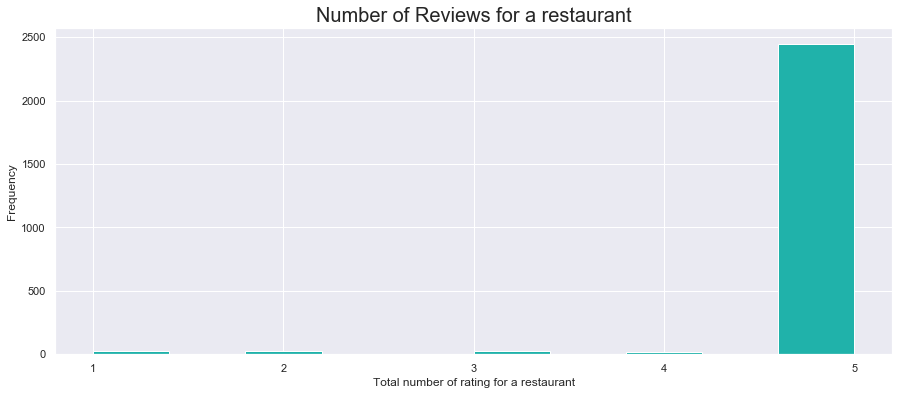

In [109]:
# Place_details['place_id'].value_counts().hist()
# plt.show()

plt.hist(Place_details['place_id'].value_counts(),rwidth = 1.9,color = 'lightseagreen')
plt.title('Number of Reviews for a restaurant', fontdict= {'fontsize': 20})
plt.xlabel('Total number of rating for a restaurant')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.show()

**Takeaway:** <br>
This is not unexpected as we know that we had a restriction on the number of reviews that can be extracted using Places API. Which is 5. 

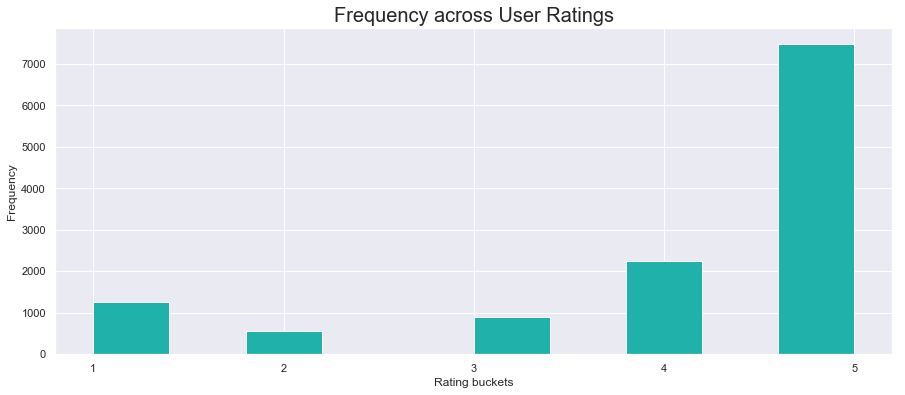

In [110]:
plt.hist(Place_details['rating'],rwidth = 1.9,color = 'lightseagreen')
plt.title('Frequency across User Ratings', fontdict= {'fontsize': 20})
plt.xlabel('Rating buckets')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.show()

**Takeaway:** <br>
We observe that few users have given lower ratings to restaurants

In [114]:
Place_details['relative_time_description'].unique()

[a month ago, in the last week, 2 weeks ago, 3 weeks ago, a week ago, ..., 12 months ago, 7 years ago, 5 years ago, 6 years ago, 8 years ago]
Length: 25
Categories (25, object): [a month ago, in the last week, 2 weeks ago, 3 weeks ago, ..., 7 years ago, 5 years ago, 6 years ago, 8 years ago]

In [115]:
timeline =['in the last week','a week ago', '2 weeks ago', '3 weeks ago', '4 weeks ago',
       'a month ago', '2 months ago','3 months ago', '4 months ago','5 months ago','6 months ago',
       '7 months ago','8 months ago', '9 months ago', '10 months ago', '11 months ago','12 months ago',  
       'a year ago','2 years ago', '3 years ago', '4 years ago',  '5 years ago', '6 years ago',
       '7 years ago','8 years ago']

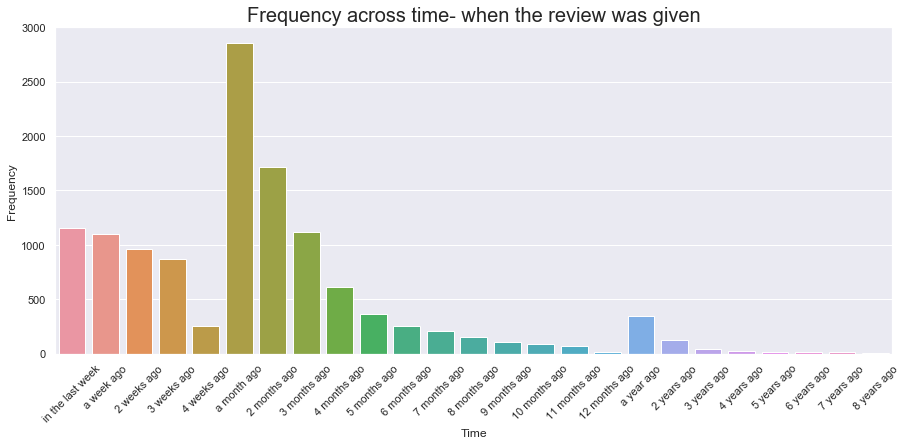

In [116]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(Place_details['relative_time_description'], order = timeline)
plt.title('Frequency across time- when the review was given', fontdict= {'fontsize': 20})
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

**Takeaway:** <br>
We have a lot of data which is almost a month old. I don't think this should affect our analysis

In [117]:
plt.rcParams['figure.figsize'] = (8, 6)

### Preprocessing text data

In [118]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re

def process_text(text):
    
    stopw = stopwords.words('english')
    stemmer = SnowballStemmer("english")
    
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # Tokenize and clean bag of words:
    tokens = word_tokenize(letters_only.lower())
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopw]
    tokens = [t for t in tokens if len(t)>1]
    
    return ' '.join(tokens)

In [119]:
test_text = Place_details['text'][0]
test_text

"pretty good food, great burgers, and always music playing loudly for those who enjoy a loud environment. it's pretty simplistic in comparison to most bars, better co sidered a tavern, than a bar. you will have fun there, with various games available, and for keno players, keno is there! with a game always on tv, you won't be disappointed if you're looking for a simple, but fun, experience in downtown lorain."

In [120]:
process_text(test_text)

'pretti good food great burger alway music play loud enjoy loud environ pretti simplist comparison bar better co sider tavern bar fun various game avail keno player keno game alway tv disappoint look simpl fun experi downtown lorain'

In [121]:
Place_details['cleaned_text'] = Place_details['text'].apply(lambda x: process_text(x))

In [122]:
Place_details.head()

,author_name,author_url,language,place_id,profile_photo_url,rating,relative_time_description,text,time,cleaned_text
0,stephen o'ryan,https://www.google.com/maps/contrib/1143032008...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-lvtilWu9NbM...,4,a month ago,"pretty good food, great burgers, and always mu...",1551493659,pretti good food great burger alway music play...
1,michael rosa,https://www.google.com/maps/contrib/1076610251...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh3.googleusercontent.com/-PzDG3nDhXzs...,4,in the last week,this is nice little hidden gem in downtown lor...,1554081605,nice littl hidden gem downtown lorain staff ba...
2,russ hazel,https://www.google.com/maps/contrib/1085331096...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-UrP4rMb1VQM...,1,2 weeks ago,"very poor service. price gouging, not honorin...",1553178427,veri poor servic price goug honor price list w...
3,christine brill,https://www.google.com/maps/contrib/1000329243...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-mS4Jlw-NUA8...,1,in the last week,atmosphere was good. dont get the chili nachos...,1554520340,atmospher good dont get chili nacho slate chee...
4,geneva willis,https://www.google.com/maps/contrib/1061015239...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-v4OZmNFbmMY...,4,2 weeks ago,good wings good drinks fast service,1552876556,good wing good drink fast servic


In [123]:
#Create a dictionary for different ratings and review clean text
cleanreview_dict = Place_details.groupby('rating')['cleaned_text'].apply(list).to_dict()

In [124]:
cleanreview_dict.keys()

dict_keys([1, 2, 3, 4, 5])

In [ ]:
#Check the length of the dictionary
assert (len(cleanreview_dict[1])+len(cleanreview_dict[2])+ \
        len(cleanreview_dict[3])+len(cleanreview_dict[4])+ \
    len(cleanreview_dict[5]) == len(Place_details))

In [155]:
Place_details['rating'].value_counts()

5    7492
4    2250
1    1254
3     902
2     571
Name: rating, dtype: int64

In [29]:
#Create Term Document Matrix (term frequency)
from collections import Counter
def create_TDM(text_list):
    tokens_allreviews = [t for text in text_list for t in text.split(' ') ]
    TDM = Counter(tokens_allreviews)
    return TDM

In [30]:
TDM1_dict = dict(create_TDM(cleanreview_dict[1]).most_common()[:100])
TDM3_dict = dict(create_TDM(cleanreview_dict[3]).most_common()[:100])
TDM5_dict = dict(create_TDM(cleanreview_dict[5]).most_common()[:100])

In [31]:
# Exclude some common words
# Extend this list further
words_toExclude = ['food','place']

In [32]:
TDM1_dict2 = {k:v for (k,v) in TDM1_dict.items() if k not in words_toExclude  }
TDM3_dict2 = {k:v for (k,v) in TDM3_dict.items() if k not in words_toExclude  }
TDM5_dict2 = {k:v for (k,v) in TDM5_dict.items() if k not in words_toExclude  }

In [172]:
#Generate wordcloud
from wordcloud import WordCloud

def generate_wc(TDM_dict, rating):
    plt.figure(figsize=(15, 15))
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(TDM_dict)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('WordCloud for reviews rated as {}'.format(str(rating)), fontsize = 20, color = 'black')
    plt.show()

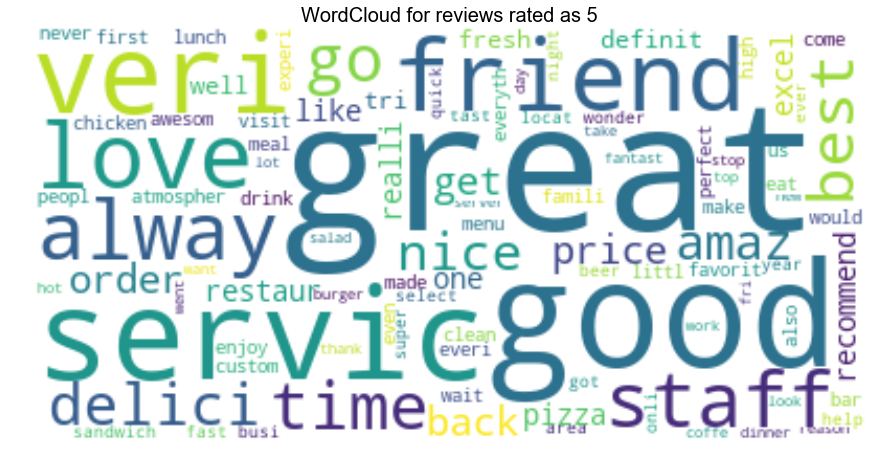

In [175]:
#Wordcloud for 5 rating
generate_wc(TDM5_dict2, 5)

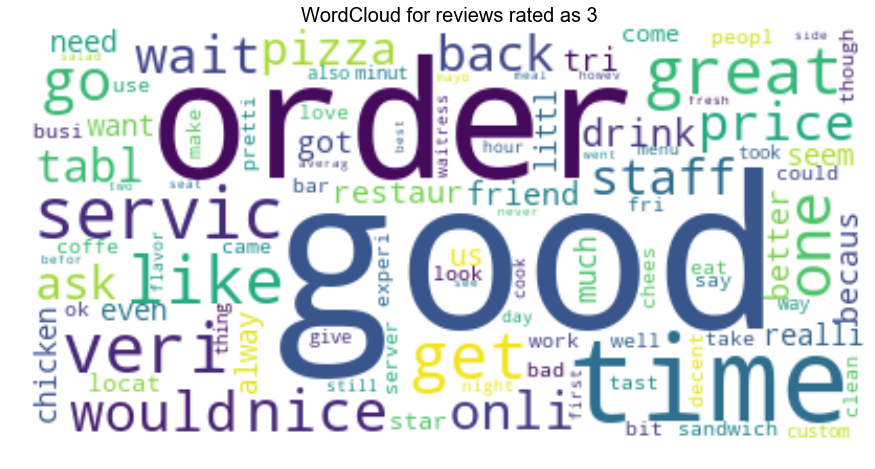

In [176]:
#Wordcloud for 3 rating
generate_wc(TDM3_dict2, 3)

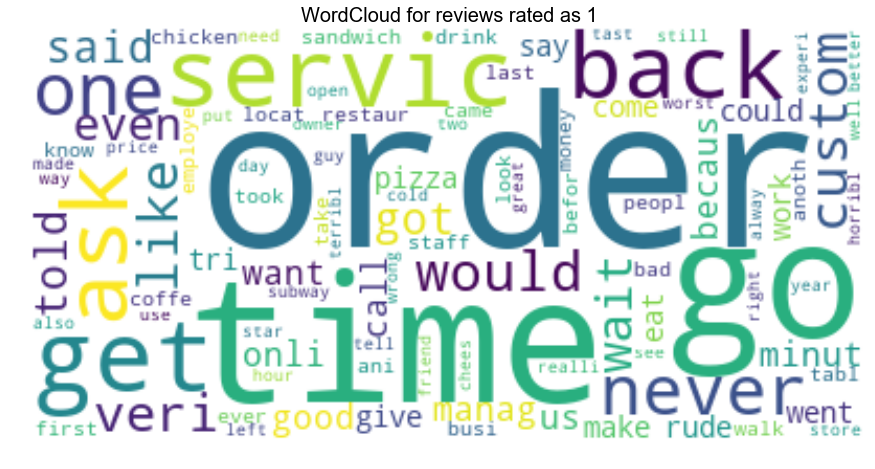

In [177]:
#Wordcloud for 1 rating
generate_wc(TDM1_dict2, 1)

In [300]:
plt.rcParams['figure.figsize'] = (8, 6)

### Tagging text data based on tags provided by Eric

In [148]:
food_categories = pd.read_csv('categoryNames.txt',header = None)
len(food_categories)

69

In [126]:
food_categories.head()

,0
0,sushi bars
1,japanese
2,breakfast brunch
3,mexican
4,tex mex


In [127]:
'sushi bars' in Place_details['text'][0]

False

In [128]:
Place_details['text_tag'] = ''

In [129]:
(Place_details['text_tag'][0] == '') & (Place_details['text_tag'][0] != '')

False

In [130]:
for i in range(len(food_categories)):
    list_tag = Place_details['text'].apply(lambda x: ',' + food_categories[0][i]  if ((food_categories[0][i] in x) & (x != '')) 
                                           else food_categories[0][i] if food_categories[0][i] in x else '') 
    Place_details['text_tag'] = Place_details['text_tag']+ list_tag

In [131]:
Place_details['text_tag'] = Place_details['text_tag'].apply(lambda x : x.split(',')[1:])

In [132]:
Place_details['nooffoodtags'] =Place_details['text_tag'].apply(lambda x : len(x))

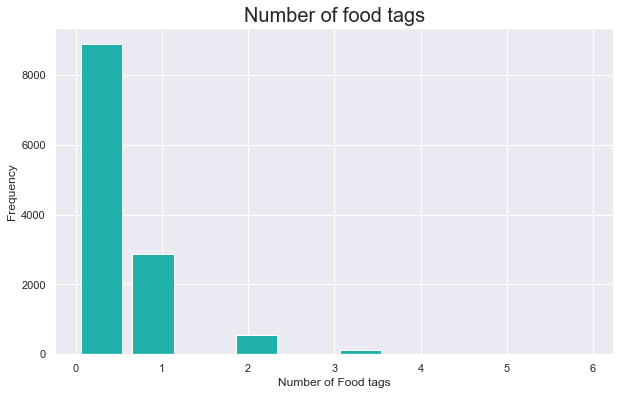

In [299]:
plt.hist(Place_details['nooffoodtags'],rwidth = 0.8,color = 'lightseagreen')
plt.title('Number of food tags', fontdict= {'fontsize': 20})
plt.xlabel('Number of Food tags')
plt.ylabel('Frequency')
plt.show()

In [134]:
print(np.round(sum(Place_details['nooffoodtags'] == 0)*100/len(Place_details),3),'% of the data is not tagged')

71.409 % of the data is not tagged


### Thats not a good news!

In [135]:
Place_details.head()

,author_name,author_url,language,place_id,profile_photo_url,rating,relative_time_description,text,time,cleaned_text,text_tag,nooffoodtags
0,stephen o'ryan,https://www.google.com/maps/contrib/1143032008...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-lvtilWu9NbM...,4,a month ago,"pretty good food, great burgers, and always mu...",1551493659,pretti good food great burger alway music play...,"[burgers, bars]",2
1,michael rosa,https://www.google.com/maps/contrib/1076610251...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh3.googleusercontent.com/-PzDG3nDhXzs...,4,in the last week,this is nice little hidden gem in downtown lor...,1554081605,nice littl hidden gem downtown lorain staff ba...,[],0
2,russ hazel,https://www.google.com/maps/contrib/1085331096...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-UrP4rMb1VQM...,1,2 weeks ago,"very poor service. price gouging, not honorin...",1553178427,veri poor servic price goug honor price list w...,[],0
3,christine brill,https://www.google.com/maps/contrib/1000329243...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-mS4Jlw-NUA8...,1,in the last week,atmosphere was good. dont get the chili nachos...,1554520340,atmospher good dont get chili nacho slate chee...,[],0
4,geneva willis,https://www.google.com/maps/contrib/1061015239...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-v4OZmNFbmMY...,4,2 weeks ago,good wings good drinks fast service,1552876556,good wing good drink fast servic,[],0


In [226]:
rows_withatag = Place_details[Place_details['nooffoodtags'] > 0]
rows_withatag = rows_withatag.reset_index(drop=True)

In [227]:
rows_withatag.shape

(3565, 12)

In [228]:
rows_withatag.head()

,author_name,author_url,language,place_id,profile_photo_url,rating,relative_time_description,text,time,cleaned_text,text_tag,nooffoodtags
0,stephen o'ryan,https://www.google.com/maps/contrib/1143032008...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-lvtilWu9NbM...,4,a month ago,"pretty good food, great burgers, and always mu...",1551493659,pretti good food great burger alway music play...,"[burgers, bars]",2
1,christine kozloski,https://www.google.com/maps/contrib/1138139214...,en,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,https://lh6.googleusercontent.com/-LZ5VYAPHYSk...,1,a month ago,i ordered two pizzas from yala's pizza today. ...,1549844878,order two pizza yala pizza today famili go est...,[pizza],1
2,trisel blau,https://www.google.com/maps/contrib/1087960240...,en,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,https://lh6.googleusercontent.com/-pfRF1WNgy0Y...,5,3 months ago,i have eaten their elisios style pizza in year...,1546529281,eaten elisio style pizza year abl enjoy visit ...,[pizza],1
3,brad koller,https://www.google.com/maps/contrib/1024202713...,en,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,https://lh3.googleusercontent.com/-zSEioYx8BAU...,5,a month ago,"every time i go back to lorain, this is a must...",1550697024,everi time go back lorain must stop still best...,[pizza],1
4,andrew bass,https://www.google.com/maps/contrib/1151247747...,en,ChIJkSZgkeVuK4cRVKRTf2Db2OI,https://lh3.googleusercontent.com/-NNu0CGRmzRw...,5,in the last week,absolutely the best donuts around. they do th...,1554066467,absolut best donut around right fresh absolut ...,[donuts],1


In [207]:
all_tags = list()
for tag in rows_withatag['text_tag']:
    all_tags = all_tags + tag
    
len(set(all_tags))

52

In [229]:
for tag in set(all_tags):
        rows_withatag['tag_'+ tag] = np.repeat(0,len(rows_withatag))

In [223]:
rows_withatag.columns

Index(['author_name', 'author_url', 'language', 'place_id',
       'profile_photo_url', 'rating', 'relative_time_description', 'text',
       'time', 'cleaned_text', 'text_tag', 'nooffoodtags', 'tag_american',
       'tag_mediterranean', 'tag_caribbean', 'tag_vegan', 'tag_fast food',
       'tag_breweries', 'tag_sum', 'tag_bars', 'tag_french', 'tag_soup',
       'tag_bagels', 'tag_vietnamese', 'tag_italian', 'tag_steakhouses',
       'tag_burgers', 'tag_hawaiian', 'tag_chicken wings',
       'tag_middle eastern', 'tag_comfort food', 'tag_food trucks',
       'tag_salad', 'tag_southern', 'tag_karaoke', 'tag_sandwiches',
       'tag_soul food', 'tag_greek', 'tag_cheesesteaks', 'tag_poke',
       'tag_vegetarian', 'tag_gluten free', 'tag_desserts',
       'tag_breakfast brunch', 'tag_diners', 'tag_mexican', 'tag_tex mex',
       'tag_delis', 'tag_hot dogs', 'tag_chinese', 'tag_barbeque',
       'tag_buffets', 'tag_thai', 'tag_noodles', 'tag_wraps',
       'tag_asian fusion', 'tag_cafes', 

In [245]:
for i in range(len(rows_withatag)):
    for tag in set(all_tags):
        if tag in rows_withatag['text_tag'][i]:
            rows_withatag['tag_'+ tag][i] = 1

C:\Users\sbagade\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [246]:
rows_withatag.head()

,author_name,author_url,language,place_id,profile_photo_url,rating,relative_time_description,text,time,cleaned_text,...,tag_wraps,tag_asian fusion,tag_cafes,tag_donuts,tag_pizza,tag_japanese,tag_indian,tag_korean,tag_local flavor,tag_seafood
0,stephen o'ryan,https://www.google.com/maps/contrib/1143032008...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-lvtilWu9NbM...,4,a month ago,"pretty good food, great burgers, and always mu...",1551493659,pretti good food great burger alway music play...,...,0,0,0,0,0,0,0,0,0,0
1,christine kozloski,https://www.google.com/maps/contrib/1138139214...,en,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,https://lh6.googleusercontent.com/-LZ5VYAPHYSk...,1,a month ago,i ordered two pizzas from yala's pizza today. ...,1549844878,order two pizza yala pizza today famili go est...,...,0,0,0,0,1,0,0,0,0,0
2,trisel blau,https://www.google.com/maps/contrib/1087960240...,en,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,https://lh6.googleusercontent.com/-pfRF1WNgy0Y...,5,3 months ago,i have eaten their elisios style pizza in year...,1546529281,eaten elisio style pizza year abl enjoy visit ...,...,0,0,0,0,1,0,0,0,0,0
3,brad koller,https://www.google.com/maps/contrib/1024202713...,en,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,https://lh3.googleusercontent.com/-zSEioYx8BAU...,5,a month ago,"every time i go back to lorain, this is a must...",1550697024,everi time go back lorain must stop still best...,...,0,0,0,0,1,0,0,0,0,0
4,andrew bass,https://www.google.com/maps/contrib/1151247747...,en,ChIJkSZgkeVuK4cRVKRTf2Db2OI,https://lh3.googleusercontent.com/-NNu0CGRmzRw...,5,in the last week,absolutely the best donuts around. they do th...,1554066467,absolut best donut around right fresh absolut ...,...,0,0,0,1,0,0,0,0,0,0


In [283]:
tag_columns_count= pd.DataFrame(rows_withatag.filter(regex='tag_').apply(sum),columns= ['Countoftag'])
tag_columns_count.head()

,Countoftag
tag_american,57
tag_mediterranean,34
tag_caribbean,5
tag_vegan,69
tag_fast food,80


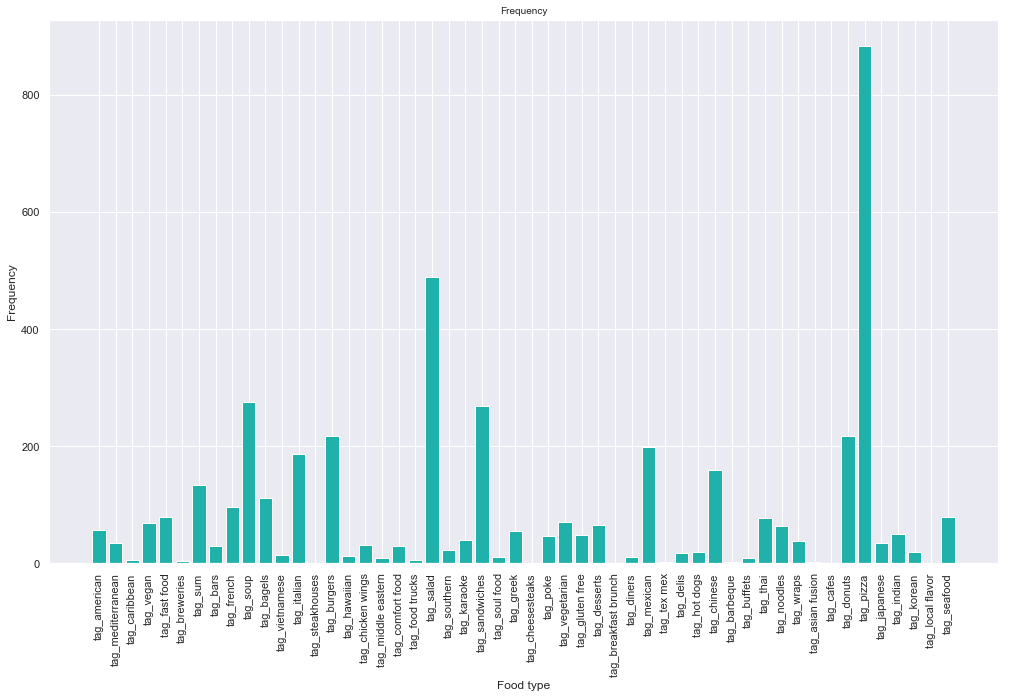

In [292]:
plt.rcParams['figure.figsize'] = (17, 10)
plt.bar(tag_columns_count.index, tag_columns_count['Countoftag'] ,color = 'lightseagreen')
plt.title('Frequency', fontdict= {'fontsize': 10})
plt.xlabel('Food type')
plt.ylabel('Frequency')
plt.xticks( rotation = 90)
plt.show()

In [294]:
rows_withatag.to_csv('PlacesAPI_Tagged_rest.csv')